C:\Users\Vaidik Sharma\AppData\Local\Temp\ipykernel_26860\827724766.py:18: RuntimeWarning: invalid value encountered in sqrt
  U = np.array([[np.sqrt(transmissivity), np.sqrt(noise)],
C:\Users\Vaidik Sharma\AppData\Local\Temp\ipykernel_26860\827724766.py:19: RuntimeWarning: invalid value encountered in sqrt
  [np.sqrt(noise), -np.sqrt(transmissivity)]], dtype=complex)


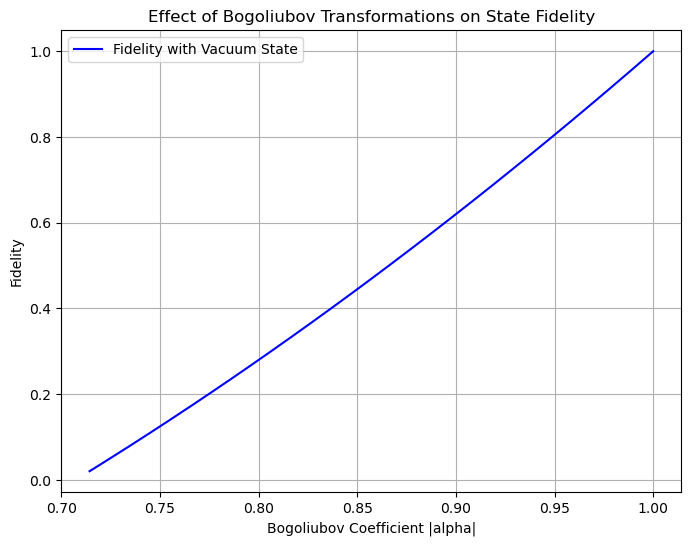

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

def bogoliubov_transformation(alpha, beta, input_state):

    transmissivity = abs(alpha)**2 - abs(beta)**2
    noise = abs(beta)**2

    U = np.array([[np.sqrt(transmissivity), np.sqrt(noise)],
                  [np.sqrt(noise), -np.sqrt(transmissivity)]], dtype=complex)

    transformed_state = U @ input_state.data
    return Statevector(transformed_state)

alphas = np.linspace(0.5, 1.0, 50)
betas = np.sqrt(1 - alphas**2)  # Ensure Bogoliubov condition |alpha|^2 + |beta|^2 = 1
input_state = Statevector([1, 0])  # Initial vacuum state

fidelities = []
for alpha, beta in zip(alphas, betas):
    transformed_state = bogoliubov_transformation(alpha, beta, input_state)
    fidelity = np.abs(np.dot(input_state.data.conj(), transformed_state.data))**2
    fidelities.append(fidelity)

plt.figure(figsize=(8, 6))
plt.plot(alphas, fidelities, label="Fidelity with Vacuum State", color='blue')
plt.xlabel("Bogoliubov Coefficient |alpha|")
plt.ylabel("Fidelity")
plt.title("Effect of Bogoliubov Transformations on State Fidelity")
plt.grid()
plt.legend()
plt.show()


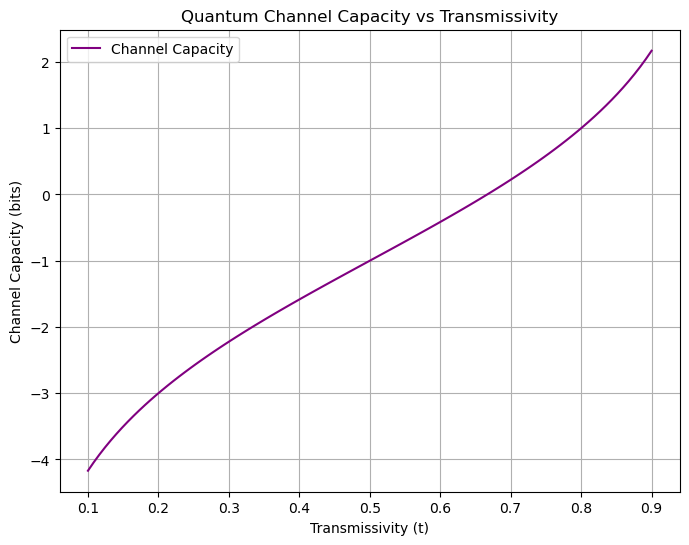

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Compute channel capacity
def compute_channel_capacity(transmissivity, noise):

    if transmissivity > 0:
        return np.log2(transmissivity / (1 - transmissivity + noise))
    return 0

transmissivities = np.linspace(0.1, 0.9, 100)
capacities = [compute_channel_capacity(t, 1-t) for t in transmissivities]

plt.figure(figsize=(8, 6))
plt.plot(transmissivities, capacities, label="Channel Capacity", color='purple')
plt.xlabel("Transmissivity (t)")
plt.ylabel("Channel Capacity (bits)")
plt.title("Quantum Channel Capacity vs Transmissivity")
plt.grid()
plt.legend()
plt.show()


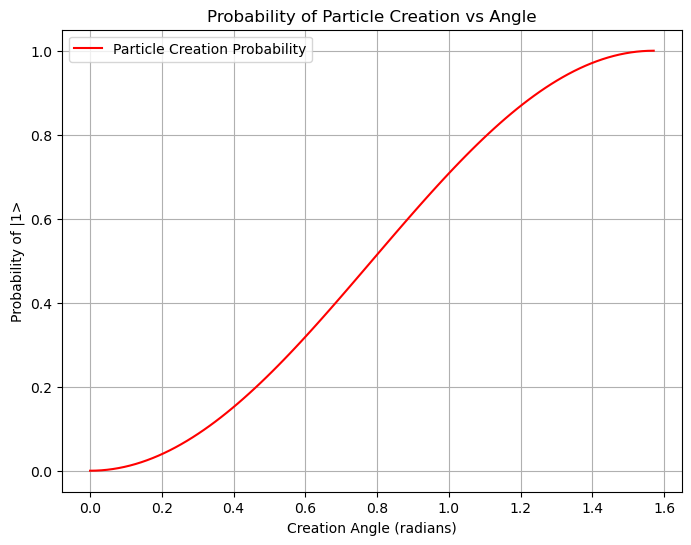

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

def particle_creation(state, angle):
    
    U = np.array([[np.cos(angle), np.sin(angle)],
                  [-np.sin(angle), np.cos(angle)]])
    return Statevector(U @ state.data)

angles = np.linspace(0, np.pi/2, 100)
state_probabilities = []

for angle in angles:
    vacuum_state = Statevector([1, 0])
    created_state = particle_creation(vacuum_state, angle)
    state_probabilities.append(abs(created_state.data[1])**2)

plt.figure(figsize=(8, 6))
plt.plot(angles, state_probabilities, label="Particle Creation Probability", color='red')
plt.xlabel("Creation Angle (radians)")
plt.ylabel("Probability of |1>")
plt.title("Probability of Particle Creation vs Angle")
plt.grid()
plt.legend()
plt.show()


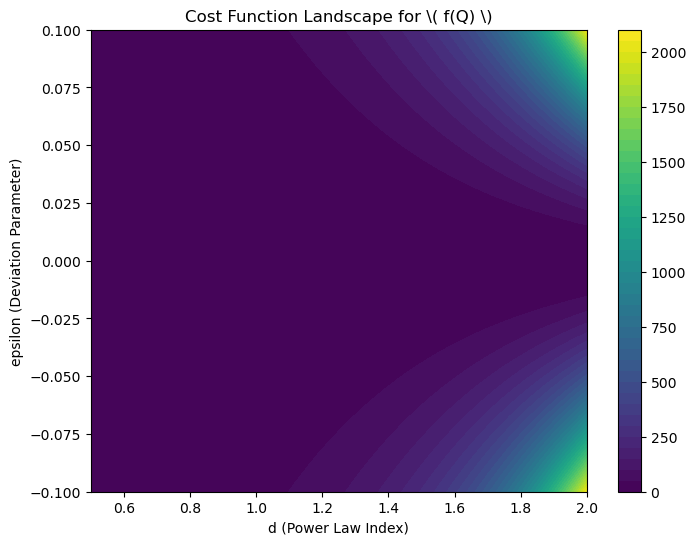

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define f(Q) model
def f_Q(Q, epsilon, d, A=1):

    return Q + epsilon * A * (Q / A)**d

# Cost function for optimization
def cost_function(epsilon, d):
    Q_values = np.linspace(0.1, 10, 100)  # Range of Q values
    f_values = f_Q(Q_values, epsilon, d)
    return np.sum((f_values - Q_values)**2)  # Minimize deviation from standard gravity

epsilons = np.linspace(-0.1, 0.1, 50)
ds = np.linspace(0.5, 2.0, 50)
costs = np.array([[cost_function(e, d) for d in ds] for e in epsilons])

X, Y = np.meshgrid(ds, epsilons)
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, costs, 50, cmap="viridis")
plt.colorbar(contour)
plt.xlabel("d (Power Law Index)")
plt.ylabel("epsilon (Deviation Parameter)")
plt.title("Cost Function Landscape for \( f(Q) \)")
plt.show()


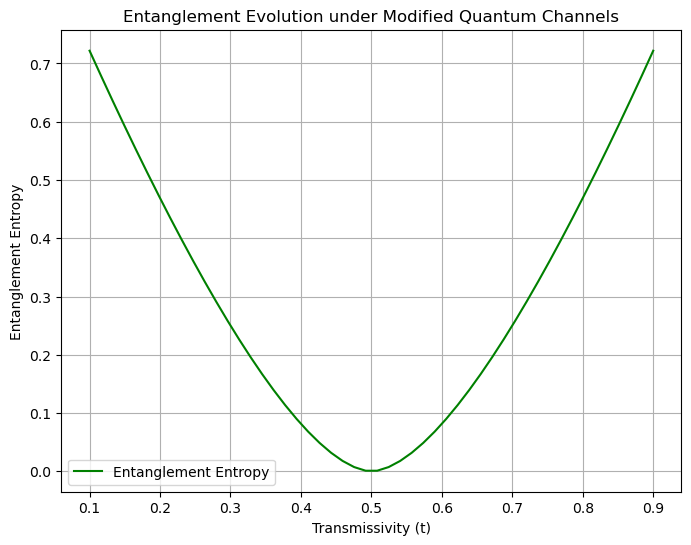

In [10]:
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy
import numpy as np
import matplotlib.pyplot as plt

# Initial Bell state density matrix
bell_state = np.array([[0.5, 0, 0, 0.5],
                       [0, 0, 0, 0],
                       [0, 0, 0, 0],
                       [0.5, 0, 0, 0.5]])
bell_density = DensityMatrix(bell_state)

def evolve_entanglement(state, transmissivity, noise):
    U = np.array([[np.sqrt(transmissivity), 0, 0, np.sqrt(noise)],
                  [0, np.sqrt(transmissivity), np.sqrt(noise), 0],
                  [0, np.sqrt(noise), -np.sqrt(transmissivity), 0],
                  [np.sqrt(noise), 0, 0, -np.sqrt(transmissivity)]], dtype=complex)
    
    evolved_data = U @ state.data @ U.T.conj()
    return DensityMatrix(evolved_data)

transmissivities = np.linspace(0.1, 0.9, 50)
entropies = []

for t in transmissivities:
    evolved_density = evolve_entanglement(bell_density, t, 1-t)
    reduced_density = partial_trace(evolved_density, [1])  # Trace out one qubit
    entropies.append(entropy(reduced_density))

plt.figure(figsize=(8, 6))
plt.plot(transmissivities, entropies, label="Entanglement Entropy", color='green')
plt.xlabel("Transmissivity (t)")
plt.ylabel("Entanglement Entropy")
plt.title("Entanglement Evolution under Modified Quantum Channels")
plt.grid()
plt.legend()
plt.show()


In [1]:
import numpy as np
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy

# Generate dataset: Quantum entanglement from Bogoliubov transformations
def generate_physics_dataset(samples=200):
    transmissivities = np.linspace(0.1, 0.9, samples)  # Transmissivity t
    noise_values = 1 - transmissivities  # Noise n
    entropies = []

    for idx, (t, noise) in enumerate(zip(transmissivities, noise_values)):
        # Define the initial Bell state density matrix
        bell_state = np.array([[0.5, 0, 0, 0.5],
                               [0, 0, 0, 0],
                               [0, 0, 0, 0],
                               [0.5, 0, 0, 0.5]], dtype=complex)
        
        # Initialize DensityMatrix from the valid 4x4 matrix
        bell_density = DensityMatrix(bell_state)
        
        # Define the 4x4 Bogoliubov transformation matrix
        U = np.array([[np.sqrt(t), 0, 0, np.sqrt(noise)],
                      [0, np.sqrt(t), np.sqrt(noise), 0],
                      [0, np.sqrt(noise), -np.sqrt(t), 0],
                      [np.sqrt(noise), 0, 0, -np.sqrt(t)]], dtype=complex)
        
        # Apply the transformation: U * rho * U†
        transformed_data = U @ bell_density.data @ U.T.conj()
        
        # Create a new DensityMatrix object from the transformed data
        evolved_density = DensityMatrix(transformed_data)
        
        # Compute entanglement entropy by tracing out one qubit
        reduced_density = partial_trace(evolved_density, [1])  # Trace out qubit 1
        entropies.append(entropy(reduced_density))

    # Stack transmissivity, noise, and entropy into feature vectors
    features = np.vstack([transmissivities, noise_values, entropies]).T
    labels = (transmissivities > 0.5).astype(int)  # Binary classification: t > 0.5
    return features, labels

features, labels = generate_physics_dataset()

print("\nFeatures (Transmissivity, Noise, Entropy):")
print(features[:5])
print("Labels (0 = low transmissivity, 1 = high transmissivity):")
print(labels[:5])



Features (Transmissivity, Noise, Entropy):
[[0.1        0.9        0.72192809]
 [0.1040201  0.8959799  0.71122801]
 [0.1080402  0.8919598  0.7005686 ]
 [0.1120603  0.8879397  0.68995032]
 [0.1160804  0.8839196  0.67937363]]
Labels (0 = low transmissivity, 1 = high transmissivity):
[0 0 0 0 0]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Standardize features for classical ML
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train Classical SVM
svm_model = SVC(kernel='rbf', C=1, gamma='auto', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate Classical SVM
y_pred_classical = svm_model.predict(X_test_scaled)
accuracy_classical = accuracy_score(y_test, y_pred_classical)

print(f"Classical SVM Accuracy: {accuracy_classical:.2f}")
print("Classification Report (Classical SVM):")
print(classification_report(y_test, y_pred_classical))


Classical SVM Accuracy: 0.98
Classification Report (Classical SVM):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

